### PDES

Using Gaussian regression on the solution of pdes

$$-\frac{d}{dx}(\theta_1 \frac{du}{dx}) = 1$$

$$u(0)=\theta_2, \qquad u(1)=0 \\ \theta_1,\theta_2>0$$

Solved analytically
$$u(x) = (1-x)(\frac{x}{2\theta_1}+\theta_2)$$

In [1]:
import numpy as np
from simple_gr import *

### Testing 
x = np.array([0,0.5,1]).reshape(-1,1)

x_s = np.linspace(0,1,100, endpoint=True).reshape(-1,1)

theta1 = 1
theta2 = 2

u = lambda x: (1-x)*(x/(2*theta1)+theta2)

mu, covs = predictive_process2(x, x_s, u, cov_exp)
    
plt.figure(1)
plt.title("Sq exponential cov function")
plot_gpr(x, x_s, u, mu, covs, samples=10,draw_samples=False)







<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

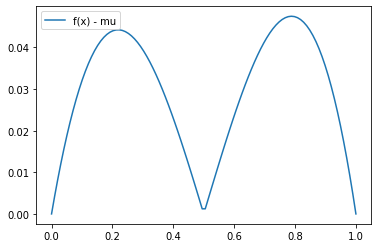

Norm of error 0.3273721845911132


In [2]:
###Error?


plt.plot(x_s, abs( u(x_s) -mu))
plt.legend(["f(x) - mu"])
plt.show()

print("Norm of error", np.linalg.norm(u(x_s)-mu))

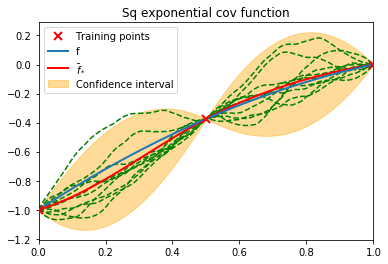

In [3]:
import numpy as np
from simple_gr import *

### Testing matern cov
x = np.array([0,0.5,1]).reshape(-1,1)

x_s = np.linspace(0,1,100, endpoint=True).reshape(-1,1)

theta1 = 1
theta2 = 1

u = lambda x: (1-x)*(x/(2*theta1)-theta2)

mu, covs = predictive_process2(x, x_s, u, cov_matern)
    
plt.figure(1)
plt.title("Sq exponential cov function")
plot_gpr(x, x_s, u, mu, covs, samples=10,draw_samples=True)







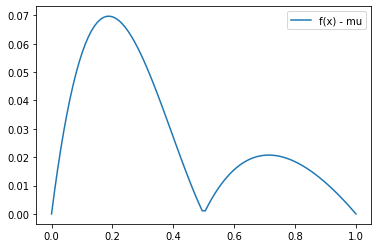

Norm of error 0.3580984785560505


In [4]:
###Error?


plt.plot(x_s, abs( u(x_s) -mu))
plt.legend(["f(x) - mu"])
plt.show()

print("Norm of error", np.linalg.norm(u(x_s)-mu))

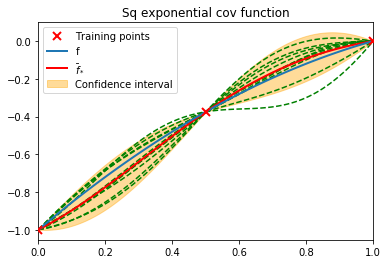

In [5]:
import numpy as np
from simple_gr import *

### Testing rational quadratic
x = np.array([0,0.5,1]).reshape(-1,1)

x_s = np.linspace(0,1,100, endpoint=True).reshape(-1,1)

theta1 = 1
theta2 = 1

u = lambda x: (1-x)*(x/(2*theta1)-theta2)

mu, covs = predictive_process2(x, x_s, u, cov_rq)
    
plt.figure(1)
plt.title("Sq exponential cov function")
plot_gpr(x, x_s, u, mu, covs, samples=10,draw_samples=True)







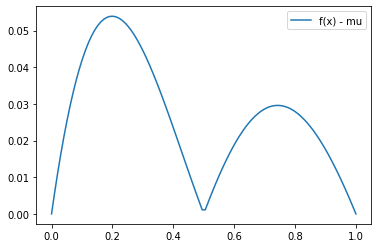

Norm of error 0.3064541734906512


In [6]:
###Error?


plt.plot(x_s, abs( u(x_s) -mu))
plt.legend(["f(x) - mu"])
plt.show()

print("Norm of error", np.linalg.norm(u(x_s)-mu))

$$-\frac{d}{dx}(k(x,\theta) \frac{du}{dx}) = 100x$$

$k(x,\theta)$ piecewise constant and I assume some boundary conditions


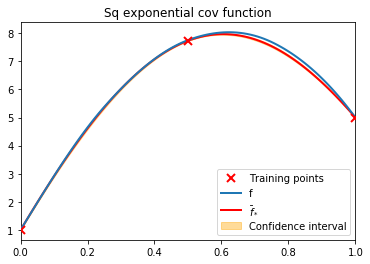

In [7]:
import problem2

### Testing 
x = np.array([0,0.5,1]).reshape(-1,1)

x_s = np.linspace(0,1,100, endpoint=True).reshape(-1,1)
M = 100

Sol = problem2.finite_diff(M)
u = lambda x: Sol[((M-1)*x).astype(int)]

mu, covs = predictive_process2(x, x_s, u, cov_exp)
    
plt.figure(1)
plt.title("Sq exponential cov function")
plot_gpr(x, x_s, u, mu, covs, samples=10,draw_samples=False)



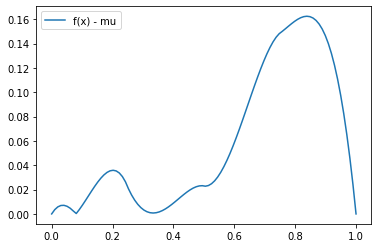

Norm of error 0.8239960258897148


In [8]:
###Error?


plt.plot(x_s, abs( u(x_s) -mu))
plt.legend(["f(x) - mu"])
plt.show()

print("Norm of error", np.linalg.norm(u(x_s)-mu))

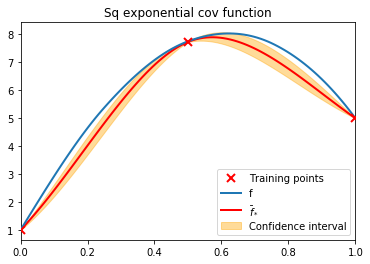

In [9]:
import problem2

### Testing 
x = np.array([0,0.5,1]).reshape(-1,1)

x_s = np.linspace(0,1,100, endpoint=True).reshape(-1,1)
M = 100

Sol = problem2.finite_diff(M)
u = lambda x: Sol[((M-1)*x).astype(int)]

mu, covs = predictive_process2(x, x_s, u, cov_matern)
    
plt.figure(1)
plt.title("Sq exponential cov function")
plot_gpr(x, x_s, u, mu, covs, samples=10,draw_samples=False)

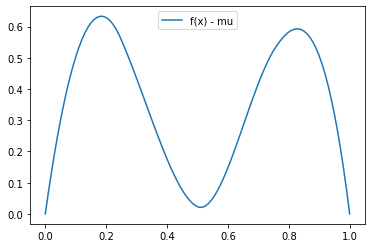

Norm of error 4.061308139169305


In [10]:
###Error?


plt.plot(x_s, abs( u(x_s) -mu))
plt.legend(["f(x) - mu"])
plt.show()

print("Norm of error", np.linalg.norm(u(x_s)-mu))

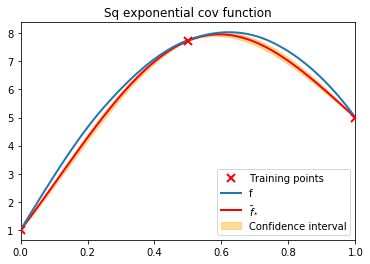

In [11]:
import problem2

### Testing 
x = np.array([0,0.5,1]).reshape(-1,1)

x_s = np.linspace(0,1,100, endpoint=True).reshape(-1,1)
M = 100

Sol = problem2.finite_diff(M)
u = lambda x: Sol[((M-1)*x).astype(int)]

mu, covs = predictive_process2(x, x_s, u, cov_rq)
    
plt.figure(1)
plt.title("Sq exponential cov function")
plot_gpr(x, x_s, u, mu, covs, samples=10,draw_samples=False)

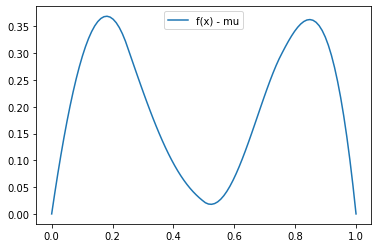

Norm of error 2.3568096341233087


In [12]:
###Error?


plt.plot(x_s, abs( u(x_s) -mu))
plt.legend(["f(x) - mu"])
plt.show()

print("Norm of error", np.linalg.norm(u(x_s)-mu))

### QoI

Estimating parametrs and other quantities of interest

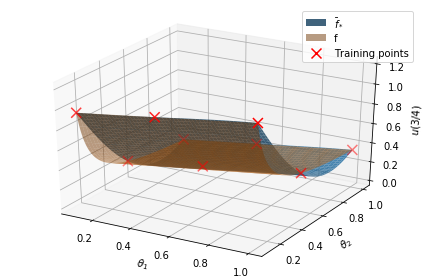

MSE:  0.01612025845941772


In [48]:
import numpy as np
from simple_gr import *

### Testing 
x = np.array([0.1,0.5,1]).reshape(-1,1)

x_s = np.linspace(0.1,1,100, endpoint=True).reshape(-1,1)




u = lambda x: (1-0.75)*(0.75/(2*x.T[0])+x.T[1])

f = lambda x: x.T[0]+x.T[1]
labels =[r"$\theta_1$", r"$\theta_2$", r"$u(3/4)$"]

mu, covs = predictive_process2(make_grid(x), make_grid(x_s), u, cov_exp)

#plot_gpr(x, x_s, np.sin, mu, covs)

plot_gpr3d(x,x_s, u, mu, covs, labels=labels)

print("MSE: ", np.square(u(make_grid(x_s))-mu).mean())


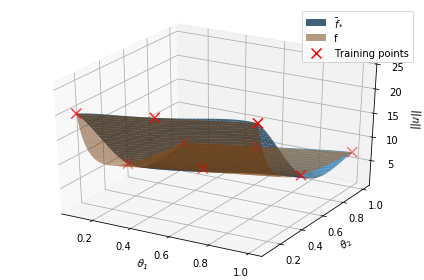

MSE:  8.925342115704135


In [46]:
import numpy as np
from simple_gr import *

### Testing 
x = np.array([0.1,0.5,1]).reshape(-1,1)

x_s = np.linspace(0.1,1,100, endpoint=True).reshape(-1,1)




u = lambda theta: np.linalg.norm((1-x_s)*(0.75/(2*theta.T[0])+theta.T[1]), axis=0)

f = lambda x: x.T[0]+x.T[1]
labels =[r"$\theta_1$", r"$\theta_2$", r"$||u||$"]

mu, covs = predictive_process2(make_grid(x), make_grid(x_s), u, cov_matern)

#plot_gpr(x, x_s, np.sin, mu, covs)

plot_gpr3d(x,x_s, u, mu, covs,labels=labels)

print("MSE: ", np.square(u(make_grid(x_s))-mu).mean())


8.925342115704135
